# **Лобанов Иван, ИУ5-63Б, НИРС**

Выбрал датасет, связанный с грибами. Целевым является столбец *class* - ядовитый ли гриб (0 - нет, 1 - да).

Ссылка на датасет: https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset

## **Загрузка датасета**

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, roc_curve, roc_auc_score
%matplotlib inline
sns.set(style="ticks")

In [3]:
data = pd.read_csv('mushroom.csv')

## **Разведочный анализ датасета**

### Основная информация о датасете

In [4]:
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [6]:
data.shape

(54035, 9)

Видим, что датасет не содержит пропусков данных

### Для понимания датасета построим графики

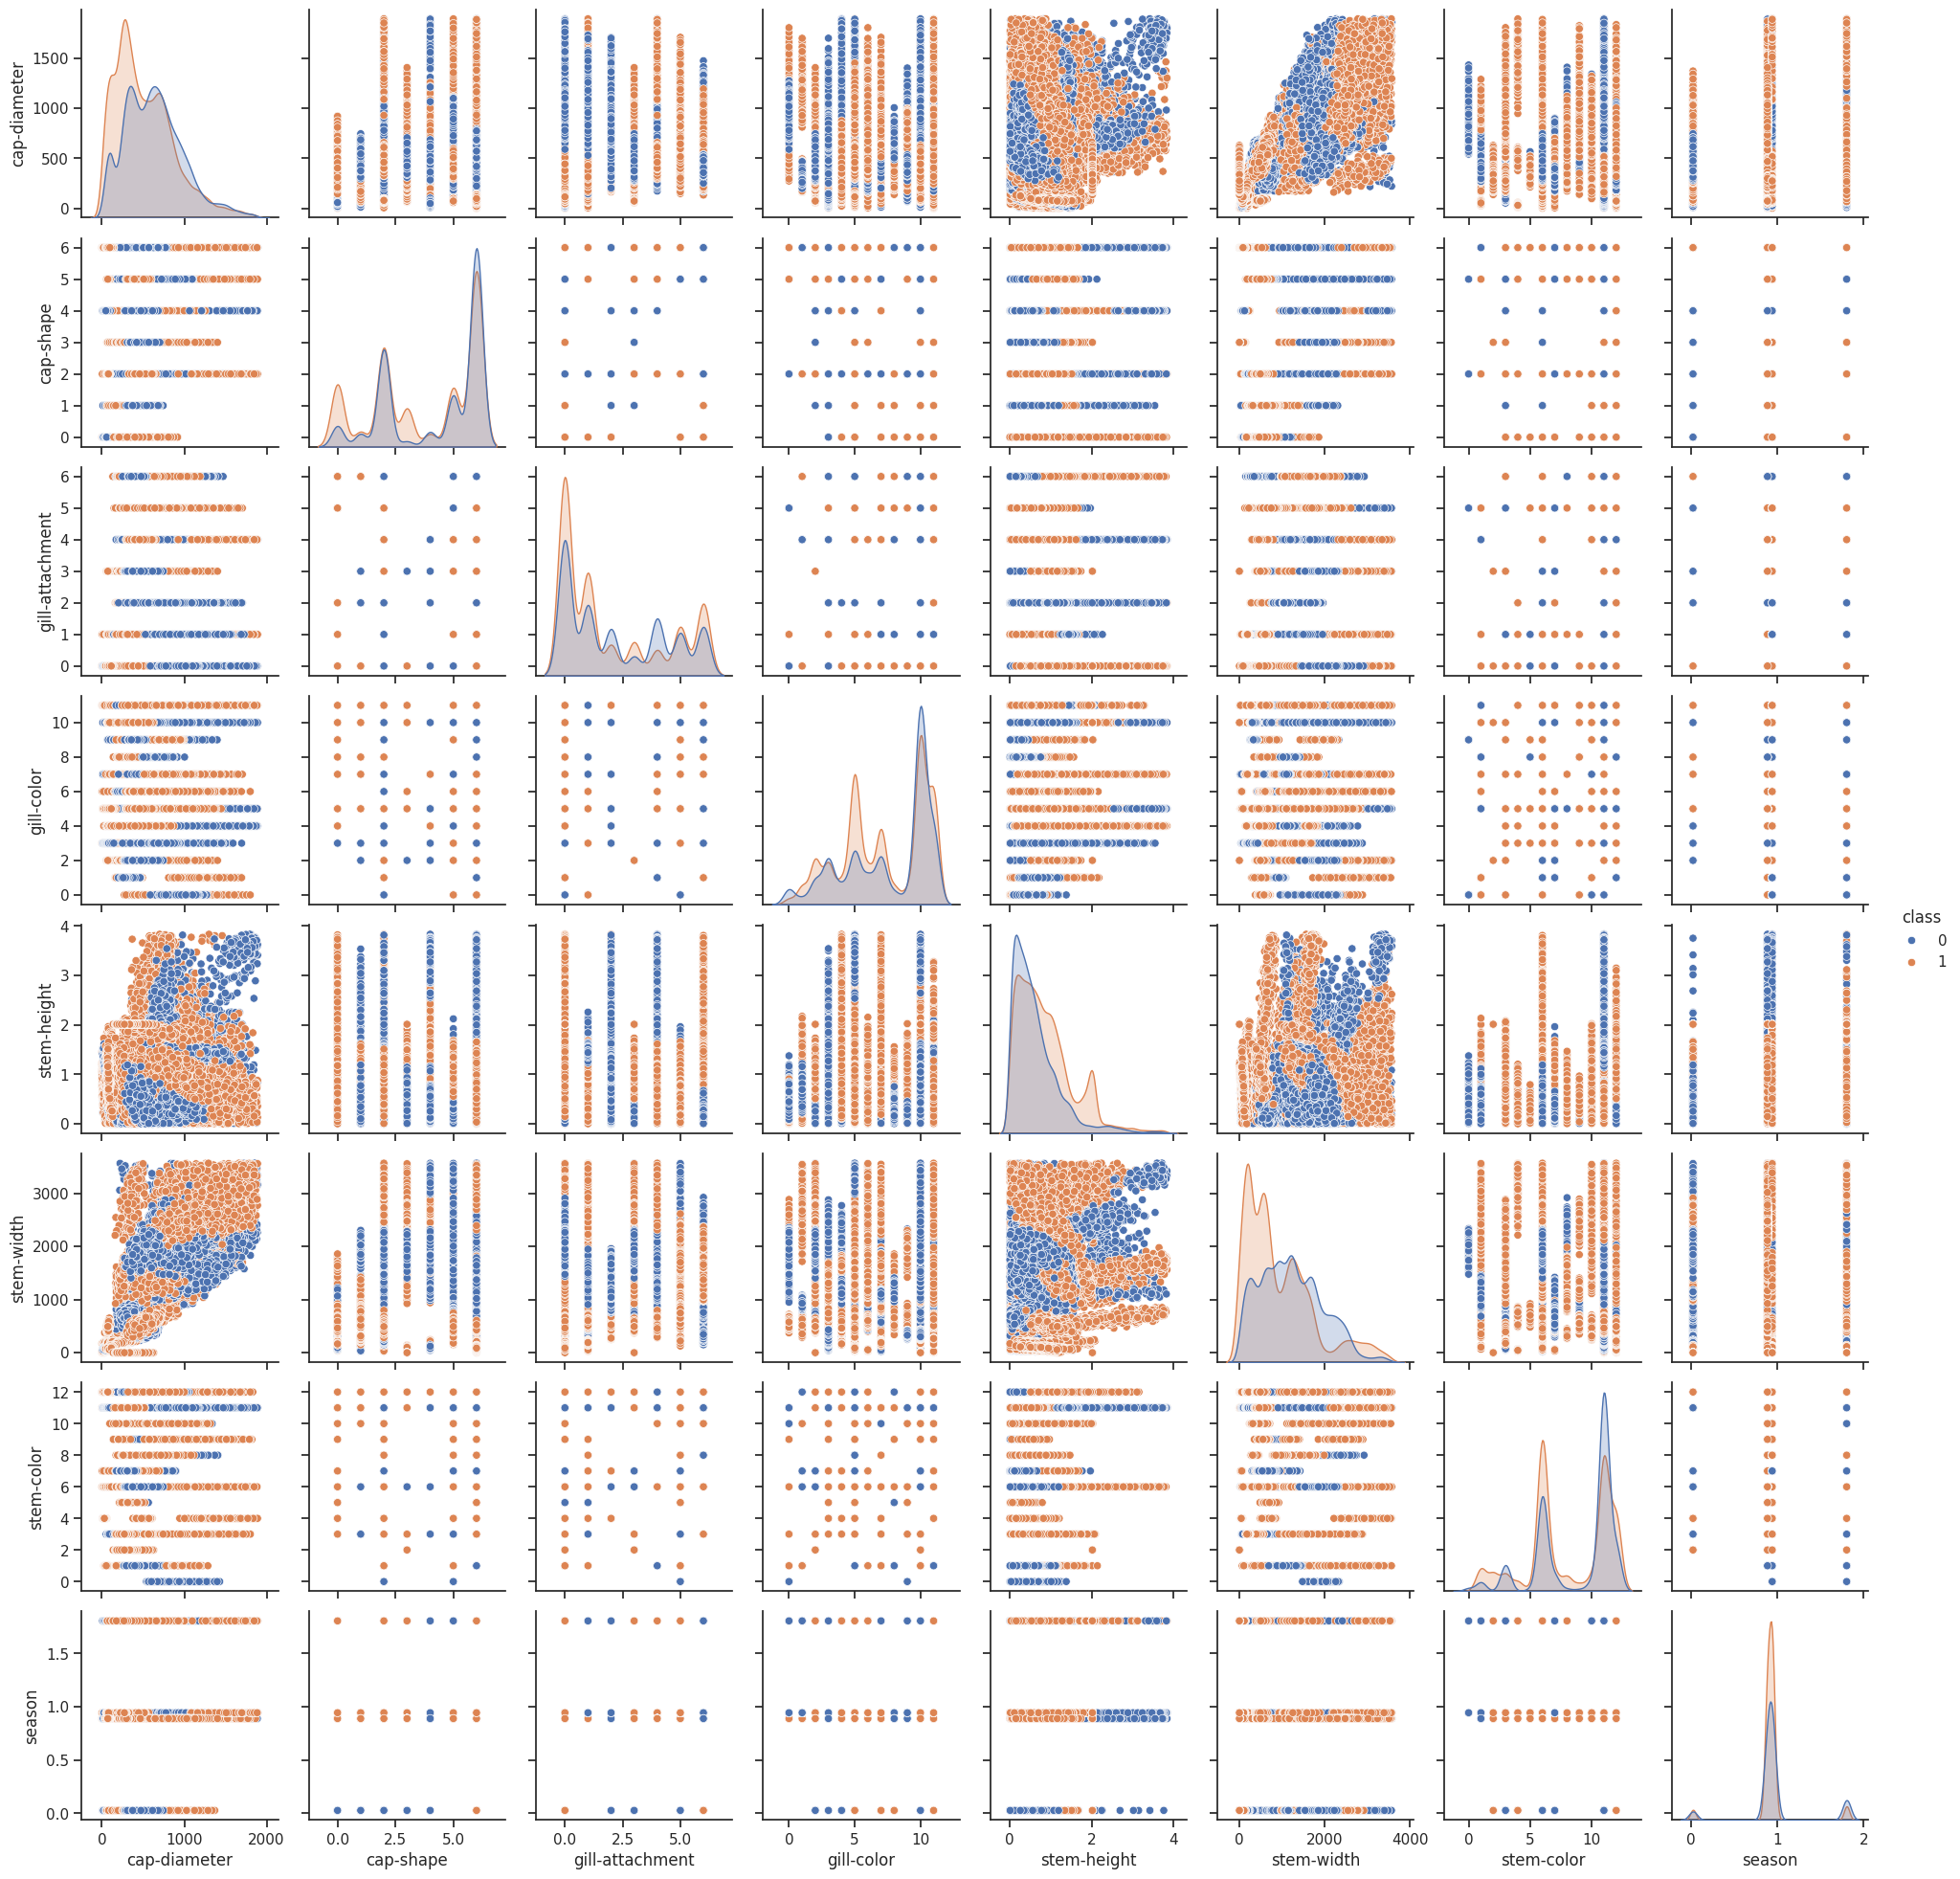

In [ ]:
sns.pairplot(data, hue="class")

### Посмотрим на целевой признак

In [7]:
data['class'].unique()

array([1, 0])

In [8]:
data['class'].value_counts()

class
1    29675
0    24360
Name: count, dtype: int64

In [9]:
total = data.shape[0]
class_1, class_0 = data['class'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'.format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 45.08%, а класс 1 составляет 54.92%.


Дисбаланс классов практически отсутствует.

## **Выбор признаков, подходящих для построения моделей.**

### Выбираем признаки

In [10]:
data.dtypes

cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

Для построения моделей будем использовать все признаки.

Категориальные признаки уже закодированы с помощью подхода LabelEncoding.

### Выполним масштабирование данных

In [11]:
scale_cols = ['cap-diameter', 'stem-height', 'stem-width']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[scale_cols])
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = scaled_data[:,i]

In [12]:
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class,cap-diameter_scaled,stem-height_scaled,stem-width_scaled
0,1372,2,2,10,3.807467,1545,11,1.804273,1,0.725542,0.992737,0.432894
1,1461,2,2,10,3.807467,1557,11,1.804273,1,0.772607,0.992737,0.436257
2,1371,2,2,10,3.612496,1566,11,1.804273,1,0.725013,0.941896,0.438778
3,1261,6,2,10,3.787572,1566,11,1.804273,1,0.666843,0.987549,0.438778
4,1305,6,2,10,3.711971,1464,11,0.943195,1,0.690111,0.967835,0.410199


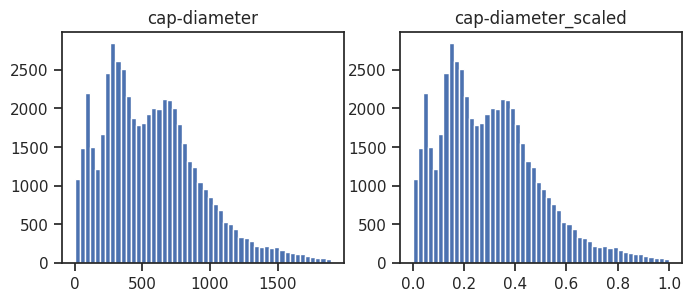

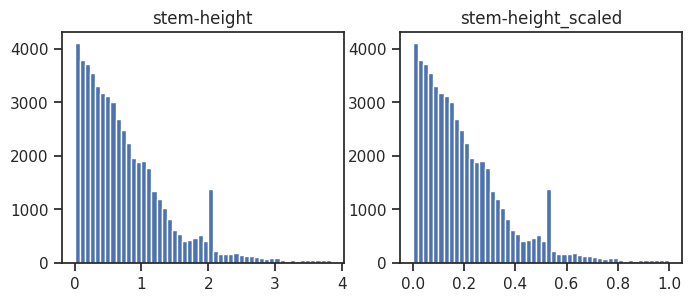

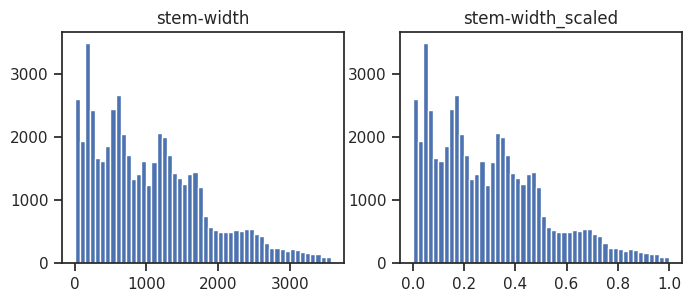

In [13]:
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

Видим, что распределение не поменялось, значит масштабирование данных прошло успешно.

## **Проведение корреляционного анализа данных. Выбор метрик. Выбор моделей.**

### Корреляционный анализ

In [14]:
train_cols = ['cap-diameter_scaled', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height_scaled', 'stem-width_scaled', 'stem-color', 'season', 'class']

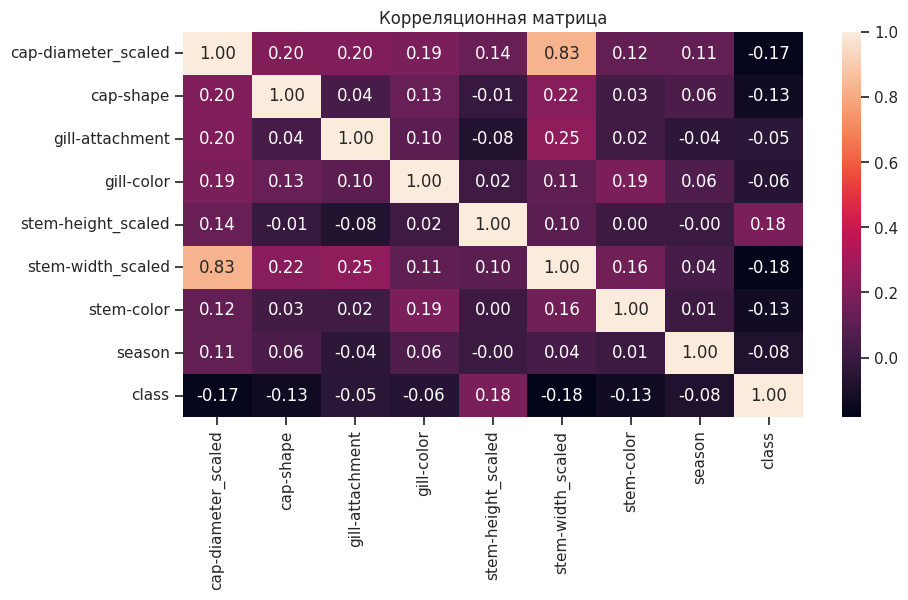

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[train_cols].corr(), annot=True, fmt='.2f')
ax.set_title('Корреляционная матрица')
plt.show()

Делаем вывод, что целевой признак напрямую не зависит ни от одного другого.

Также видим, что толщина ножки гриба сильно зависит диаметра шляпки, что в целом логично.

### Выбор метрик для последующей оценки качества моделей

В качестве метрик будем использовать те, которые формируются на основе confusion-матрицы: accuracy, precision, recall, f1-меру. Эти метрики очень хорошо подходят для оценки решения задачи классификации.

Также будем использовать метрику roc_auc, которая основана на вычислении следующих характеристик:

TPR=TP/(TP+FN)
 - True Positive Rate, откладывается по оси ординат. Совпадает с recall.

FPR=FP/(FP+TN)
 - False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

In [78]:
class MetricLogger:
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
             'alg': pd.Series([], dtype='str'),
             'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения, если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric'] == metric) & (self.df['alg'] == alg)].index, inplace=True)
        # Добавление нового значения
        temp = pd.DataFrame([{'metric': metric, 'alg': alg, 'value': value}])
        self.df = pd.concat([self.df, temp], ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric'] == metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values

    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5,
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a, b in zip(pos, array_metric):
            plt.text(0.5, a - 0.05, str(round(b, 3)), color='white')
        plt.show()

In [91]:
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score,
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    #plt.figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

### Выбор моделей

Решаем задачу классификации, поэтому будем использовать соедующие модели:
- Логистическая регрессия
- Метод ближайших соседей
- Решающее дерево
- Случайный лес
- Градиентный бустинг

## **Разделение датасета на обучающую и тестовую выборки**

In [16]:
train, test = train_test_split(data[train_cols], test_size=0.2, random_state=42)

print("Train size:", len(train))
print("Test size:", len(test))

Train size: 43228
Test size: 10807


In [17]:
X_train = train.drop('class', axis=1)
y_train = train['class']
X_test = test.drop('class', axis=1)
y_test = test['class']

## **Начальное обучение моделей**

In [49]:
models = {
    'LogR': LogisticRegression(max_iter=1000000),
    'KNN_50': KNeighborsClassifier(n_neighbors=50),
    'Tree': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'GB': GradientBoostingClassifier()
}

In [79]:
# Сохранение метрик
logger = MetricLogger()

In [96]:
def train_model(model_name, model, logger):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)[:, 1] # Предполагаем, что используется метод predict_proba

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_score)

    logger.add('accuracy', model_name, accuracy)
    logger.add('precision', model_name, precision)
    logger.add('recall', model_name, recall)
    logger.add('f1', model_name, f1)
    logger.add('roc_auc', model_name, roc_auc)

    print(f'{model_name} accuracy: {accuracy}')
    print(f'{model_name} precision: {precision}')
    print(f'{model_name} recall: {recall}')
    print(f'{model_name} f1: {f1}')
    print()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    draw_roc_curve(y_test, y_score, axes[0])
    axes[0].set_title(f'ROC Curve for {model_name}')
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation='vertical', ax=axes[1])
    disp.ax_.set_title(f'Confusion Matrix for {model_name}')
    plt.tight_layout()
    plt.show()

LogR accuracy: 0.6366244101045618
LogR precision: 0.6514522821576764
LogR recall: 0.7187182095625636
LogR f1: 0.6834340991535671



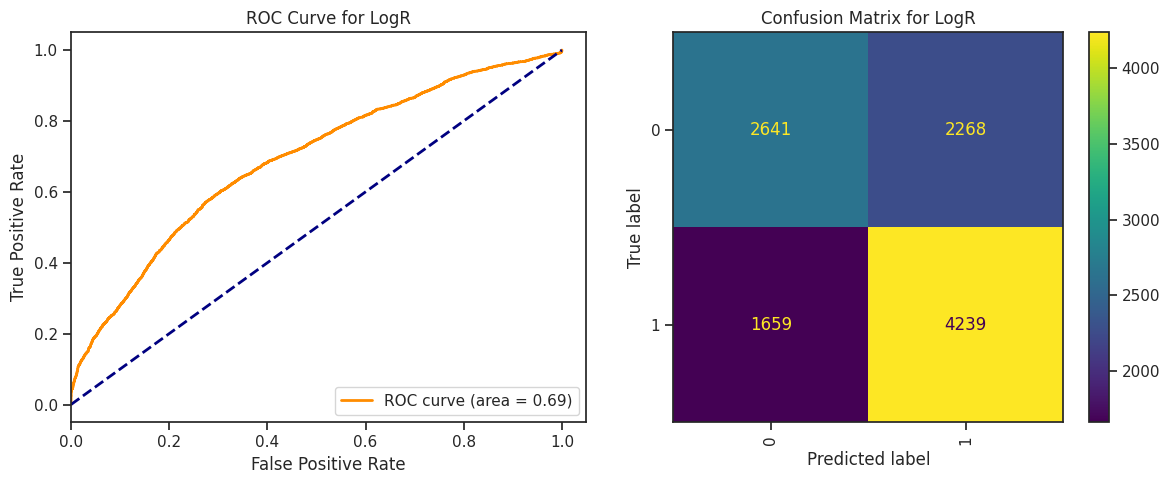

KNN_50 accuracy: 0.9767743129453133
KNN_50 precision: 0.9776687531720522
KNN_50 recall: 0.9798236690403527
KNN_50 f1: 0.9787450249809467



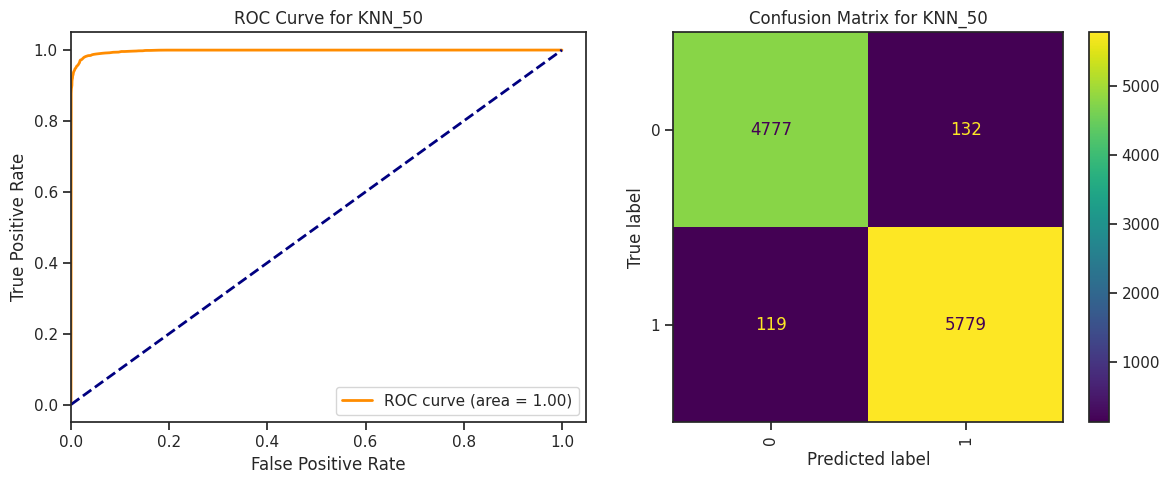

Tree accuracy: 0.9780697695937818
Tree precision: 0.9778828296471382
Tree recall: 0.9820278060359444
Tree f1: 0.9799509347770916



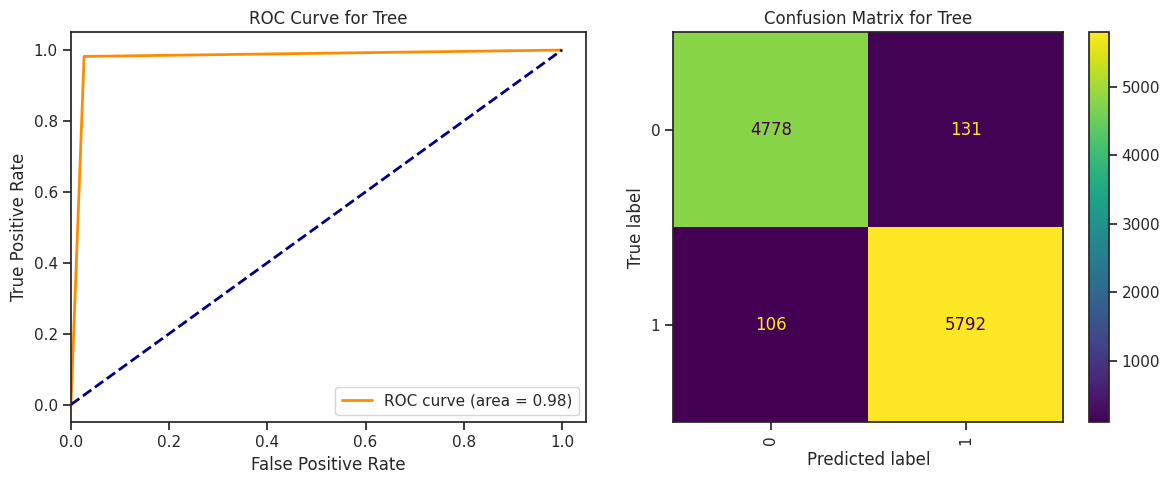

RF accuracy: 0.9910243360784676
RF precision: 0.9916935073741312
RF recall: 0.9918616480162767
RF f1: 0.9917775705687887



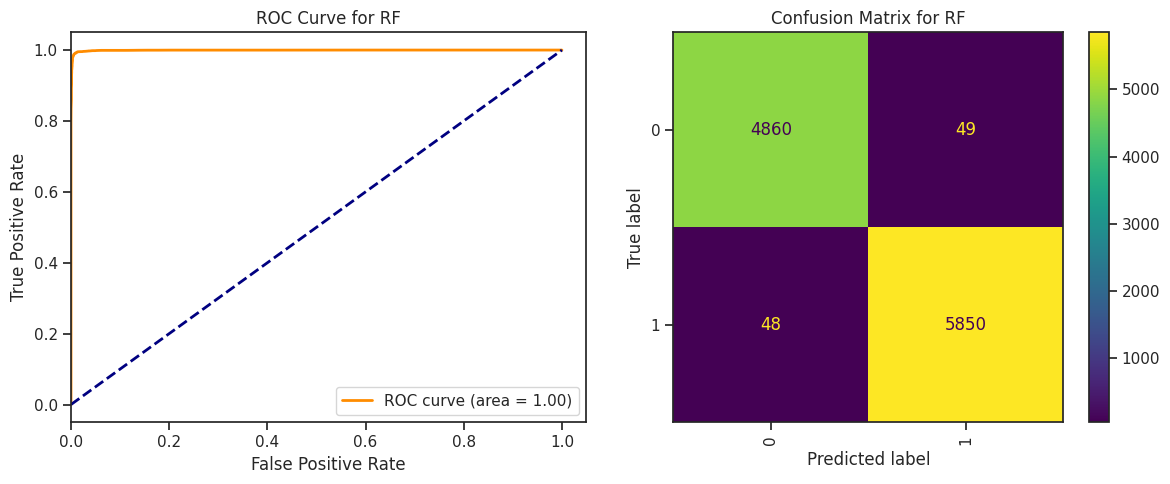

GB accuracy: 0.8847968909040437
GB precision: 0.8976243377200479
GB recall: 0.8904713462190573
GB f1: 0.8940335347689166



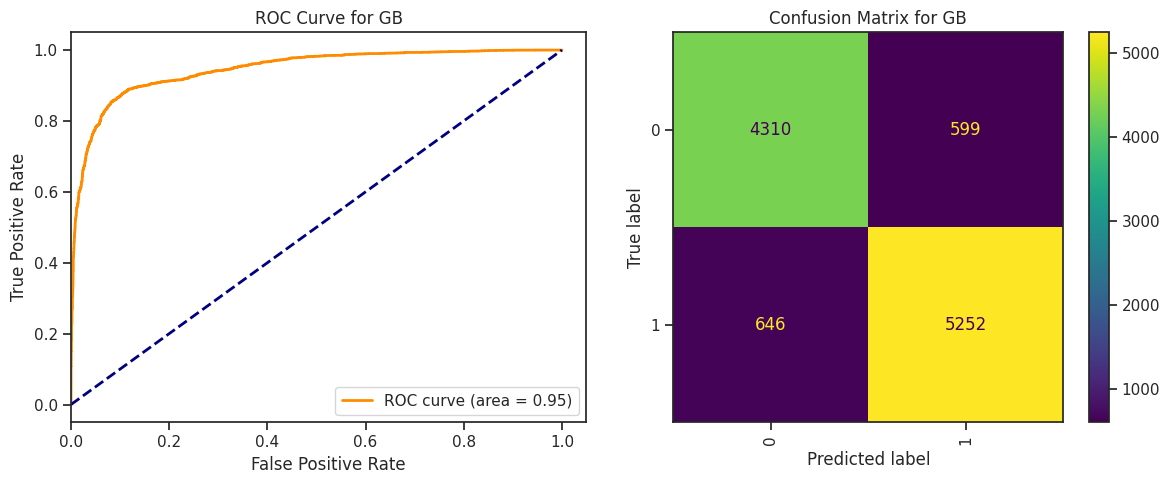

In [97]:
for model_name, model in models.items():
    train_model(model_name, model, logger)

Видим, что из коробки лучше всего себя показал RandomForestClassifier

## **Подбор гиперпараметров**

In [52]:
X_train.shape

(43228, 8)

In [65]:
n_range_list = list(range(0,51,5))
n_range_list[0] = 1

n_range = np.array(n_range_list)
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [66]:
%%time
grid_search_cv = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
grid_search_cv.fit(X_train, y_train)

CPU times: user 53.6 s, sys: 764 ms, total: 54.3 s
Wall time: 1min


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             scoring='accuracy')

In [67]:
# Лучшая модель
grid_search_cv.best_estimator_

KNeighborsClassifier()

In [68]:
# Лучшее значение параметров
grid_search_cv.best_params_

{'n_neighbors': 5}

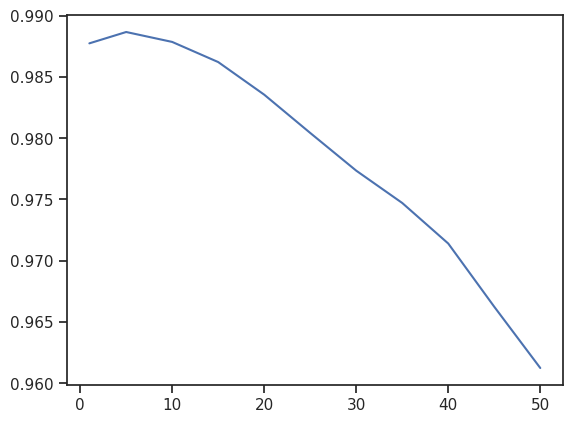

In [69]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, grid_search_cv.cv_results_['mean_test_score'])

## **Сравнение качества полученных моделей с качеством baseline-моделей**

In [70]:
models_grid = {
    'KNN_50': KNeighborsClassifier(n_neighbors=50),
    'KNN_5': grid_search_cv.best_estimator_
}

KNN_50 accuracy: 0.9767743129453133
KNN_50 precision: 0.9776687531720522
KNN_50 recall: 0.9798236690403527
KNN_50 f1: 0.9787450249809467



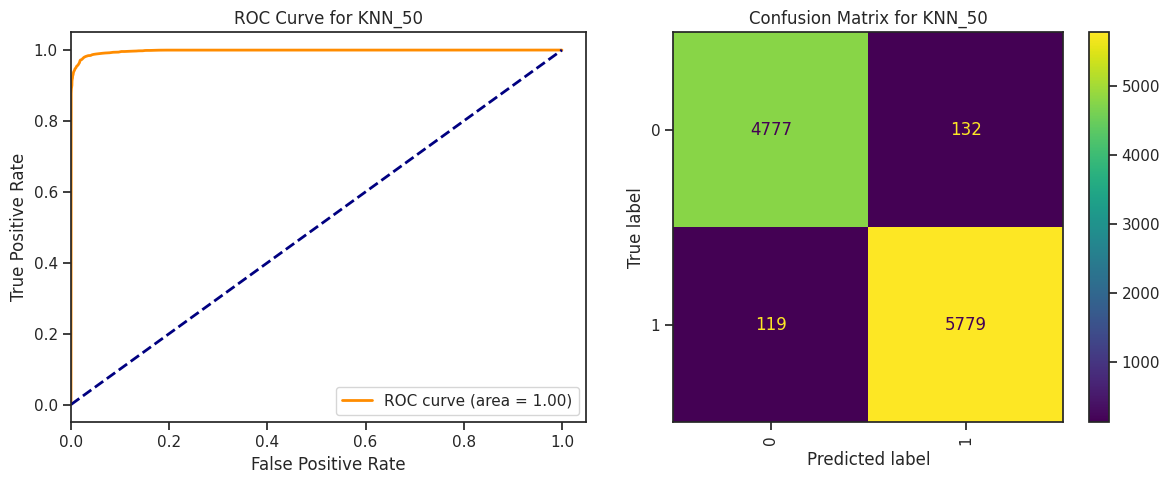

KNN_5 accuracy: 0.9900990099009901
KNN_5 precision: 0.9886919831223628
KNN_5 recall: 0.993218040013564
KNN_5 f1: 0.990949843525332



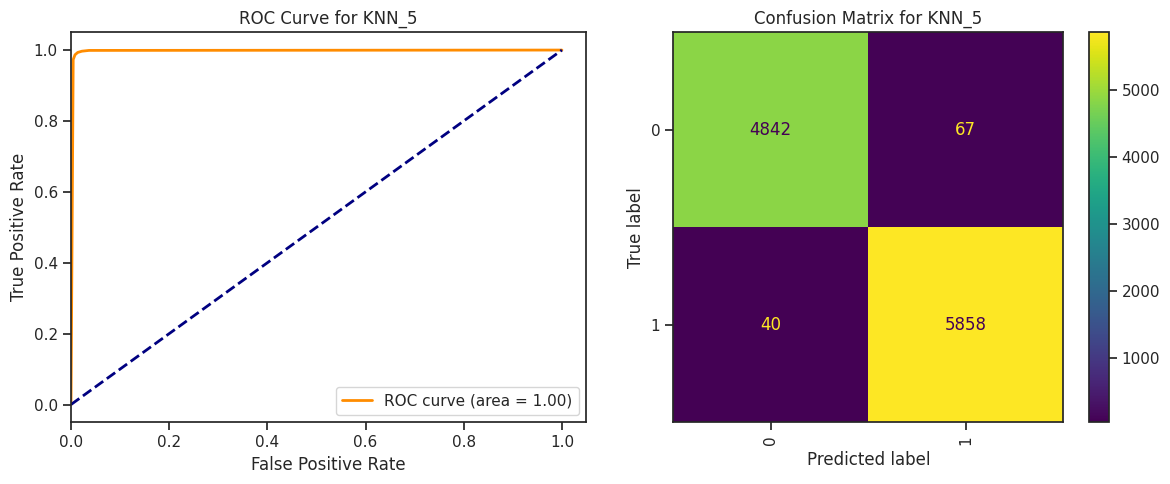

In [98]:
for model_name, model in models_grid.items():
    train_model(model_name, model, logger)

Видим, что KNN(5) действительно по всем метрикам лучше, чем KNN(50), которая была выбрана изначально.

## **Выводы**

In [99]:
# Метрики качества модели
metrics = logger.df['metric'].unique()
metrics

array(['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], dtype=object)

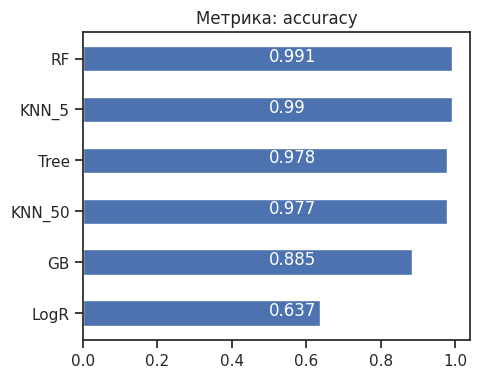

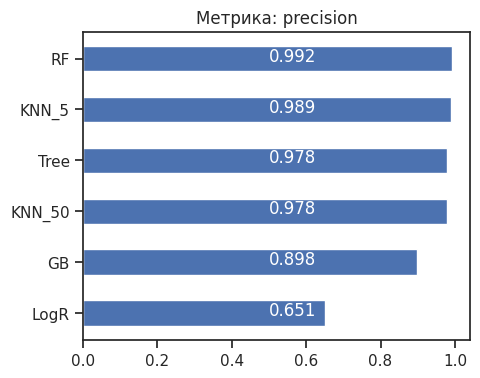

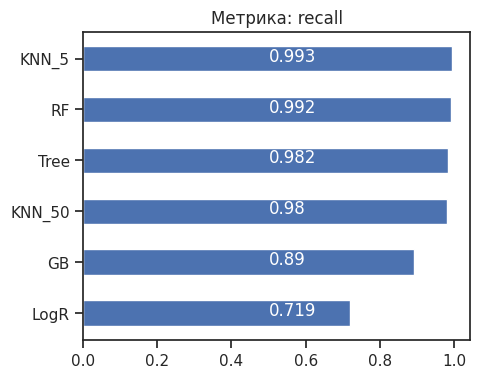

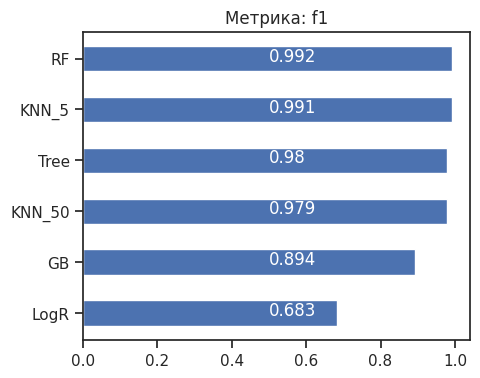

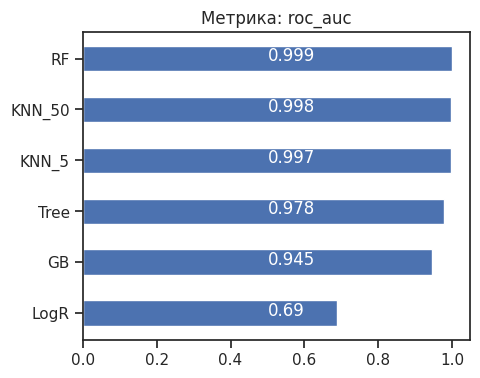

In [100]:
# Построим графики метрик качества модели
for metric in metrics:
    logger.plot('Метрика: ' + metric, metric, figsize=(5, 4))

Видим, что RandomForestClassifier показал себя лучше всех остальных моделей по 4-м метрикам из 5-и, поэтому лучше всего подходит для решения этой задачи.